# Определение характеристик успешной компьютерной игры


# План исследования

Шаг 1. Изучение данных

Шаг 2. Предобработка данных

     2.1. Преобразование названий столбцов к нижнему регистру;
     2.2. Преобразование данных в нужные типы:
     2.3. Обработка нулевых значений по столбцам 'name','genre'
     2.4. Обработка пропущенных значений по столбцу 'year of release'
     2.5. Обработка  значений по столбцу 'user_score', 'critic_score' , 'rating'
     2.6. Преобразование типов данных после предобработки
     2.7. Добавление столбца с суммарными продажами
     
Шаг 3.  Исследовательский анализ данных

    3.1. Анализ количества выпускаемых игр за разные годы 
    3.2. Исследование объемов продаж с 1995 по 2016 гг. по топ-10 платформ (по объему продаж)
    3.3. Выявление характерного срока появления и исчезновения  платформ
    3.4. Определение лидеров платформ по продажам за актуальный период
    3.5. Диаграммы размаха по глобальным продажам игр в разбивке по платформам
    3.6. Влияние отзывов пользователей и критиков на продажи игр от самой популярной консоли
    3.7. Влияние отзывов пользователей и критиков на продажи игр 
    3.8. Распредление игр по жанрам
    
Шаг 4. Портрет пользователя каждого региона

    4.1. Самые популярные платформы для пользователей из North America/Europe/Japan
    4.2. Самые популярные жанры для пользователей из North America/Europe/Japan
    4.3. Влияние рейтинга ESRB на продажи в отдельном регионе
    
Шаг 5. Проверка гипотез

Общий вывод

## Изучение данных

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.graph_objects as go
import scipy.stats as st
import numpy as numpy

df = pd.read_csv('/datasets/games.csv')

pd.options.display.max_rows = 100
display(df.head(100))


print('\x1b[1;94m'+'Общая информация'+'\x1b[0m')
df.info()
print(' ')
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
 


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В анализируемой таблице представлено 16715 записей об объекте исследований - компьютерных играх, каждый имеет 11 признаков, из которых 4 качественных и 7 количественных. 
Присутствуют пропущенные значения в столбцах: "Name","Year_of_Release","Genre","Critic_Score","User_Score","Rating".

## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [2]:
df.columns = ['name', 'platform', 'year_of_release','genre', 'na_sales','eu_sales','jp_sales', 'other_sales', 
              'critic_score','user_score','rating']
display(df.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


###  Преобразование данных в нужные типы

In [3]:
df['year_of_release'] = df['year_of_release'].astype('uint16', errors='ignore')
 
print(df.dtypes)  

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


#### Вывод

Преобразован тип данных в столбце с данными о годе выпуска на uint16 для экономии памяти. Тип данных в столбце "user_score" с object на float, чтобы в дальнейшем можно было проводить с ним вычислительный операции.

### Обработка нулевых значений по столбцам 'name','genre'

In [4]:
#Показ строк с двумя пропущенными значениями в столбце с названиями игр
print('\x1b[1;94m'+'Показ строк с пропущенными значениями по столбцу "name"'+'\x1b[0m')
print(df[df['name'].isnull()])

#Просмотр остальных данных по 1993 г.
display(df.loc[df['year_of_release'] == 1993])

#Удаление строк с пропущенными значениями 
df.dropna(subset=['name'],inplace=True)

Показ строк с пропущенными значениями по столбцу "name"
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN
476,Star Fox,SNES,1993.0,Shooter,1.61,0.51,0.80,0.07,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
852,Super Street Fighter II,SNES,1993.0,Fighting,0.52,0.16,1.29,0.03,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,1.48,0.39,0.00,0.06,NaN,NaN,NaN
953,Secret of Mana,SNES,1993.0,Role-Playing,0.25,0.07,1.49,0.02,NaN,NaN,NaN
1009,Disney's Aladdin,SNES,1993.0,Platform,0.94,0.34,0.21,0.27,NaN,NaN,NaN
1010,Kirby's Adventure,NES,1993.0,Platform,0.79,0.14,0.80,0.02,NaN,NaN,NaN
1053,Super Puyo Puyo,SNES,1993.0,Puzzle,0.00,0.00,1.69,0.01,NaN,NaN,NaN
1263,Sonic CD,SCD,1993.0,Platform,1.00,0.36,0.09,0.05,NaN,NaN,NaN


#### Вывод

В представленном датасете пропущены два значения c названиями игр. У обеих игр год выпуска - 1993 г. По данным за 1993 г., можно предположить, что пропуски не связаны с датой выпуска игр, скорее всего они случайны. Пропущенные значения составляют менее 1%, замену произвести нельзя, поэтому удаляем эти строки. Пропуски в столбце "жанр" связаны с пропусками в названиях игр, поэтому пропущенные значения по этому столбцу также исчезли. 

### Обработка пропущенных значений по столбцу 'year of release'

In [5]:
#Пропущены значения по столбцу year_of_release
nan_to_total_year = df['year_of_release'].isna().sum()/len(df['year_of_release'])
print('Процент пропущенных значений по столбцу "year_of_release" : {:.2%}'.format(nan_to_total_year))

#Удаление строк с пропущенными значениями 
df.dropna(subset=['year_of_release'],inplace=True)

Процент пропущенных значений по столбцу "year_of_release" : 1.61%


#### Вывод

Закономерность, на основании которой могли быть пропущены данные, не определена, поэтому заменить пропуски не представляется возможным. Процент пропущенных значений низкий- 1.61, можно удалить эти данные. 

### Обработка  значений по столбцу 'user_score', 'critic_score' , 'rating'

In [6]:
#В столбце user_score присутствуют значение tbd (обнаружены при преобразовании данных)
tbd_rating = df[df['user_score'].str.contains('tbd', na=False)]
display(tbd_rating.head(100))

#Просмотр статистики по данным с рейтингом tbd
tbd_rating.describe()

#Замена пропущенных значений на 0
df.loc[df['user_score'] == 'tbd','user_score']=0
df['user_score'] = df['user_score'].fillna(0)
df['critic_score'] = df['critic_score'].fillna(0)
df['rating'] = df['rating'].fillna(0)

df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Вывод

Аббревиатура tbd (to be decided or to be determined) обозначает, что рейтинг игры пользователями ещё не определен. Вероятно, это связано с низкими продажами (н-р в Японии 2700 копий вместо обычных 77000 копий), пользователи не могут составить своё мнение, или же количество оценок не достаточно.
Причину пропуска достоверно невозможно выразить на основе информации, содержащейся в наборе данных. Можно предположить, что какие-то игры не рассматривались пользователями/критиками для оценки, либо же эта информация не была добавлена в данные в результате технических ошибок. Пропуски по столбцам данных с рейтингом заменим на 0, чтобы была возможность использовать остальную информацию по играм.

### Преобразование типов данных после предобработки

In [7]:
df['user_score'] = df['user_score'].astype('float')

### Добавление столбца с суммарными продажами

In [8]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,30.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,0,29.68
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,0,27.84


## Исследовательский анализ данных

### Анализ количества выпускаемых игр за разные годы 

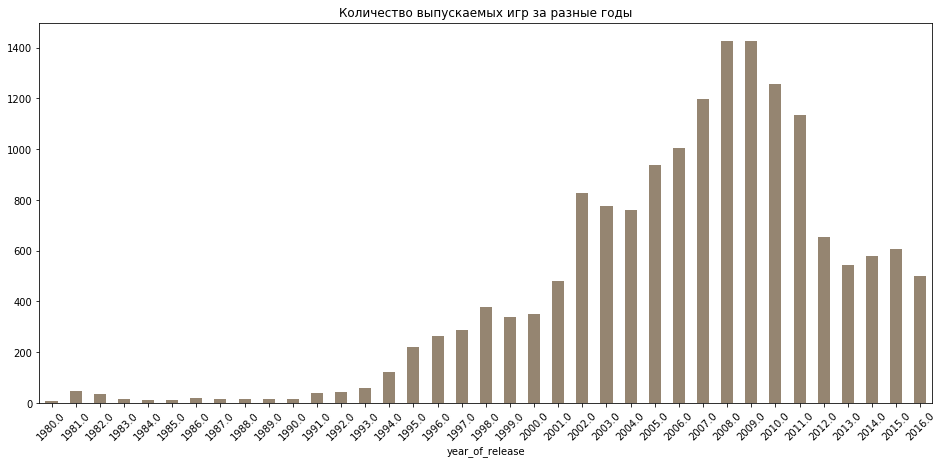

In [9]:
grouped_years = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
grouped_years.columns = ['count']

ax_2 = grouped_years.plot(kind='bar',figsize = [16,7], title = 'Количество выпускаемых игр за разные годы', rot = 45, 
                          color = '#958571',legend = False)

#### Вывод

На основании данных можно сделать вывод, что рост количества выпускаемых игр стремительно пошёл вверху после 1995 года. Пик наблюдается в 2008 и 2009 году. Наиболее важные данные по этому периоду находятся в в периоде 1995 - 2016 гг. Данные до 1995г по количеству выпускаемых игр можно не рссматривать. 

### Исследование объемов продаж с 1995 по 2016 гг. по топ-10 платформ (по объему продаж)

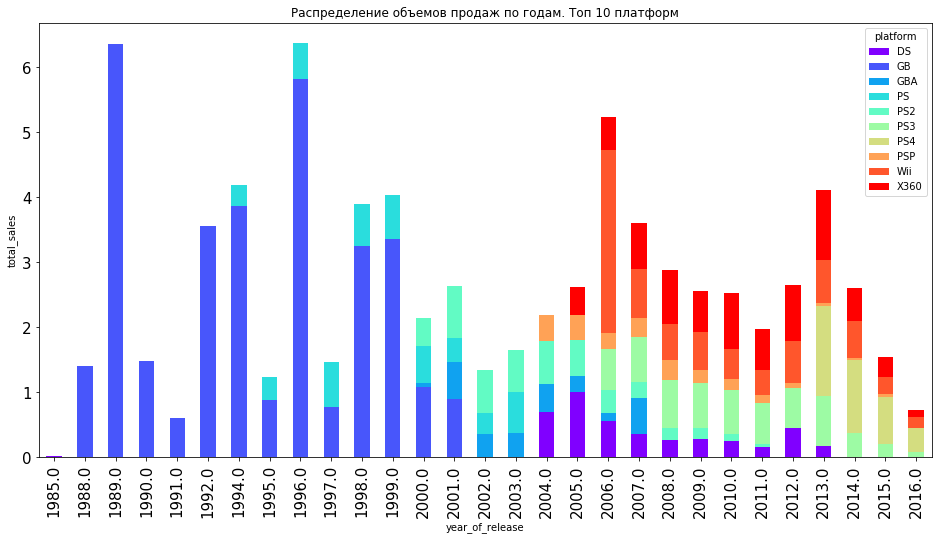

In [10]:
#Группируем данные по платформе,сортируем по убыванию,выводим топ 10
platform_grouped_top10 = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).nlargest(10)
platform_names_top10 = platform_grouped_top10.index

#Срез по году и платформам:
df_new_year = df.loc[df['year_of_release'] >= 1995]
df_new = df.query('platform in @platform_names_top10') 

#Строим график:
pivot = df_new.pivot_table(index='year_of_release',columns='platform',values = 'total_sales')
plot =  pivot.plot.bar(stacked=True, fontsize=15,figsize=(16,8),colormap='rainbow')
plt.ylabel('total_sales')
plt.title('Распределение объемов продаж по годам. Топ 10 платформ')
plt.show()

#### Вывод

Из графика можно сделать вывод, что до  2001 года лидером по продажам была платформа - GB. Она прекратила выпуск игр в 2001. В настоящее время конкурируют между собой следующий платформы: X360,PS4,PS3,Wii.

### Выявление характерного срока появления и исчезновения  платформ

Средняя продолжительность жизни платформы:


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



year_of_release    7.612903
dtype: float64

Text(0.5, 0.98, 'Средняя продолжительность жизни платформы')

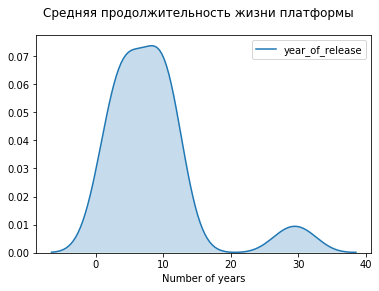

In [11]:
#Группируем данные по платформе.Возвращаем диапазон значений по столбцу год
lasting_of_game = df.groupby('platform',as_index=False)['year_of_release'].agg(numpy.ptp)

#Находим среднее значение по столбцу с данными о продолжительности 
print('\x1b[1;94m'+'Средняя продолжительность жизни платформы:'+'\x1b[0m')
display(lasting_of_game.mean())

#Строим график ядерной оценки плотности
sns_plot = sns.kdeplot(lasting_of_game['year_of_release'],shade=True,clip=(0,32))
plt.xlabel('Number of years')
sns_plot.figure.suptitle("Средняя продолжительность жизни платформы", fontsize = 12)

#### Вывод 

Исходя из полученных данных, характерный срок появления и исчезновения  платформ равен 8 лет.

### Определение лидеров платформ по продажам за актуальный период

Возьмем актуальный период 2013-2016 гг. Так как средняя продолжительность жизни платформы - 8 лет, то в выбранный период попадут растущие платформы. Данных за три года достаточно, чтобы сделать прогноз на следующий год. 

<function matplotlib.pyplot.show(*args, **kw)>

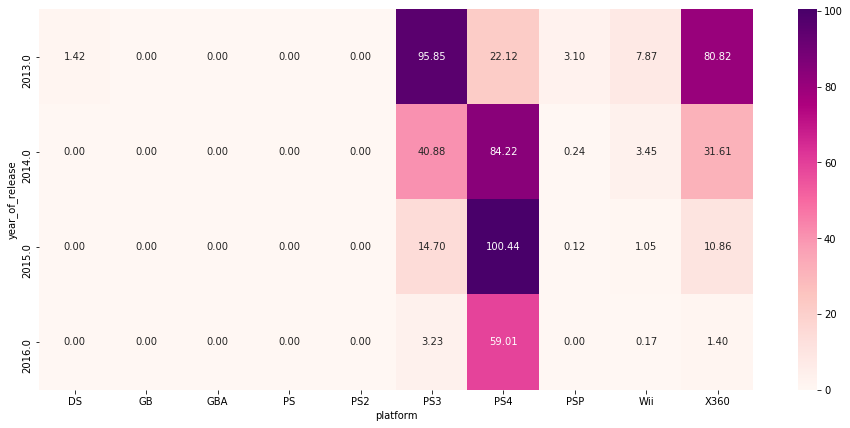

In [12]:
#Сгруппируем данные по годам и по платформе
grouped_df = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
grouped_df.fillna(0, inplace=True)

grouped_df = grouped_df[grouped_df.index >= 2013]

for platform in grouped_df.columns:
    if platform not in platform_names_top10:
        grouped_df.drop(platform, axis=1, inplace=True)
        
plt.figure(figsize = [16,7])        
sns.heatmap(grouped_df,annot=True,fmt=".2f",cmap='RdPu')
plt.show

#### Вывод 

В результате группировки появились пропущенные значения. Это связано с появлением и исчезновением платформ на рынке, разные платформы выпускали игры в разное время. Заменили пропущенные значения на 0. 
Лидирует по продажам платформа - PS4.Она находится в активной фазе роста.
Наблюдается падение продаж по платформам PSP,Wii
Потенциально прибыльные платформы: PS4, PS3, X360

### Диаграммы размаха по глобальным продажам игр в разбивке по платформам

Text(0.5, 1, 'Объем продаж по всем видам платформ')

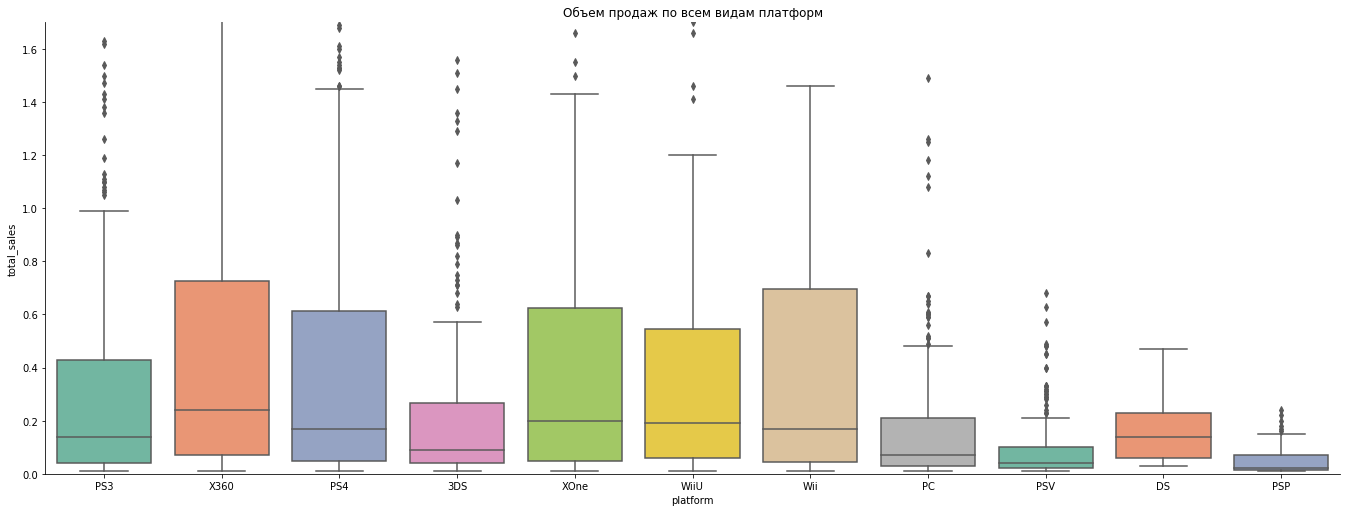

In [13]:
actual_df = df.query('year_of_release >= 2013')

sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=actual_df, 
            orient='v', 
            height=7, 
            aspect=2.7, 
            palette='Set2')
plt.ylim(0,1.7)
plt.title('Объем продаж по всем видам платформ')

In [14]:
actual_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,265.79
PS3,154.66
XOne,145.05
3DS,136.97
X360,124.69
WiiU,59.94
PC,36.47
PSV,29.73
Wii,12.54


#### Вывод 

К лидерам по средним продажам относятся X360, XOne, WiiU. 
К лидерам по продажам за актуальный период (2013-2016 гг.) относятся PS4, PS3 и XOne.

### Влияние отзывов пользователей и критиков на продажи игр от самой популярной консоли

Коэффициент корреляции
-0.03
Коэффициент корреляции
0.41


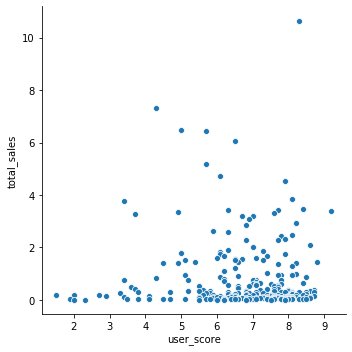

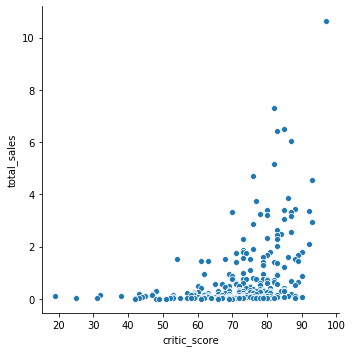

In [15]:
ps4 = actual_df.query('platform == "PS4" and (user_score > 0) and (critic_score > 0)')

# Коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж, корреляционная диаграмма
for column in ['user_score', 'critic_score']:
    print('\x1b[1;94m'+'Коэффициент корреляции'+'\x1b[0m')
    print(round(ps4[column].corr(ps4['total_sales']), 2))
    sns.relplot(x=column, y="total_sales", data=ps4)

#### Вывод 

Наблюдается зависимость объемов продаж по играм от консоли PS4 от отзывов критиков. Коэффициент корреляции составил - 41%. Оценки пользователей никак не влияют на продажи игр.

### Влияние отзывов пользователей и критиков на продажи игр 

PS3
Коэффициент корреляции user_score и total_sales: 0.02
Коэффициент корреляции critic_score и total_sales: 0.34
XOne
Коэффициент корреляции user_score и total_sales: -0.09
Коэффициент корреляции critic_score и total_sales: 0.41
3DS
Коэффициент корреляции user_score и total_sales: 0.27
Коэффициент корреляции critic_score и total_sales: 0.34
X360
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.35
WiiU
Коэффициент корреляции user_score и total_sales: 0.41
Коэффициент корреляции critic_score и total_sales: 0.38


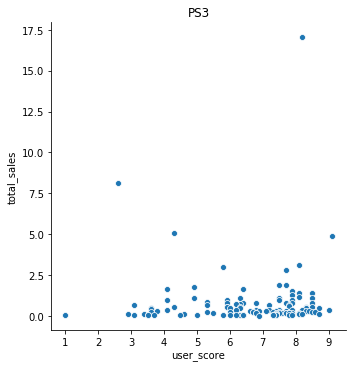

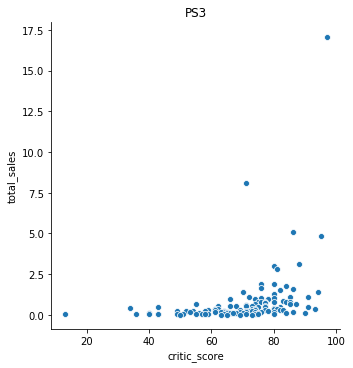

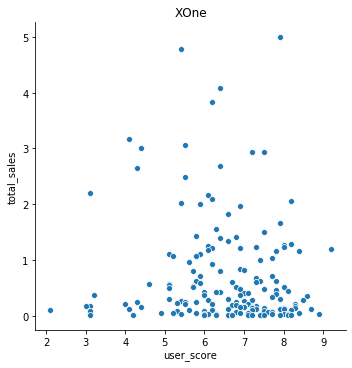

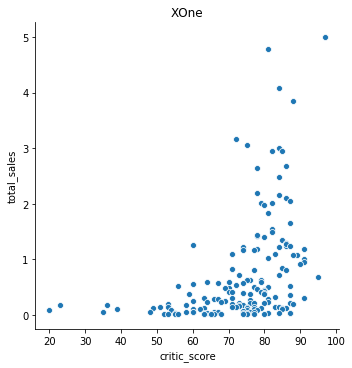

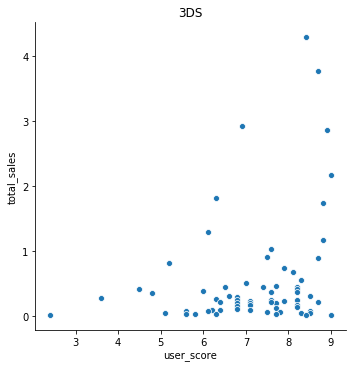

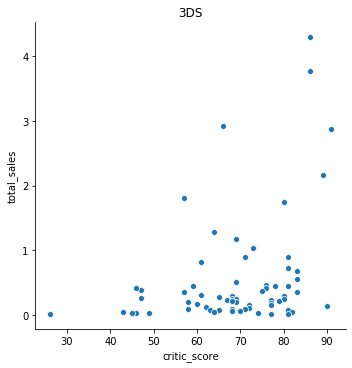

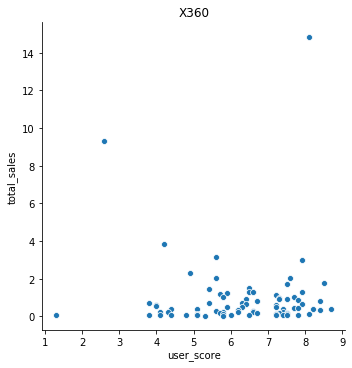

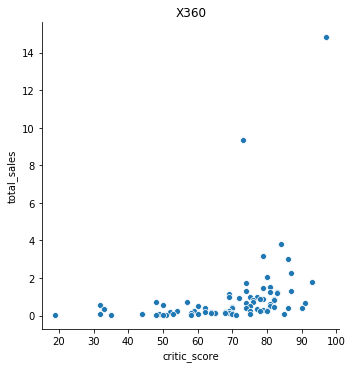

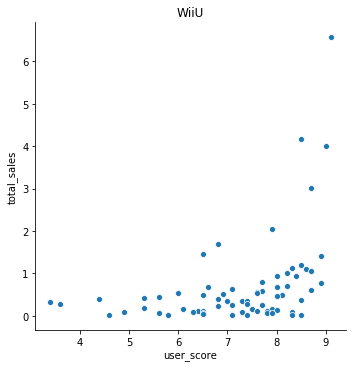

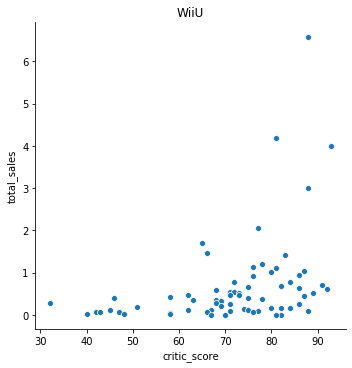

In [16]:
for platform in ['PS3','XOne','3DS','X360', 'WiiU']:
    print('\x1b[1;94m'+platform+'\x1b[0m')
    for column in ['user_score', 'critic_score']:
        upd_platform_data = actual_df.query('platform == @platform and (user_score > 0) and (critic_score > 0)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(upd_platform_data[column].corr(upd_platform_data['total_sales']), 2)))
        sns.relplot(x=column, y="total_sales", data=upd_platform_data)
        plt.title(platform)

#### Вывод 

Зависимость продажи игр у других консолей от отзывов пользователей/критиков аналогична выводам по платформе PS4. В целом, продажи игр зависят от оценок критиков. 

### Распределение игр по жанрам

Text(0.5, 1.0, 'Распределение игр по жанрам')

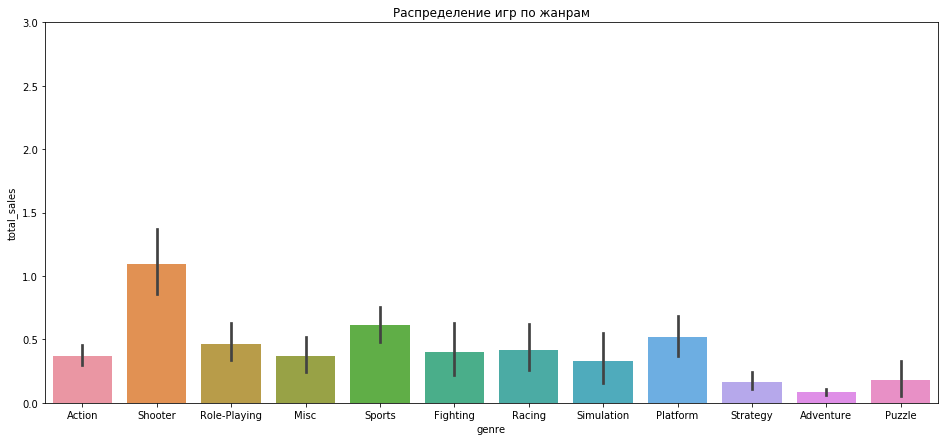

In [17]:
genre_sales = actual_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values('total_sales', ascending=False)

plt.figure(figsize = [16,7]) 
sns.barplot(x='genre', y="total_sales", data=actual_df, )
plt.ylim(0, 3)
plt.title('Распределение игр по жанрам')

#### Вывод

Наиболее популярном жанром среди игр является - Shooter. Лидируют также жанры Sports и Platform. Самыми непопулярными жанрами являются - Adventure и Puzzle.

## Портрет пользователя каждого региона

### Самые популярные платформы для пользователей из North America/Europe/Japan

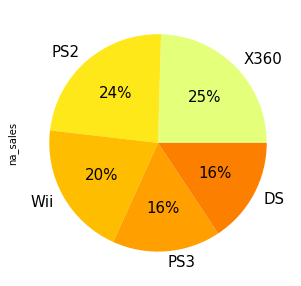

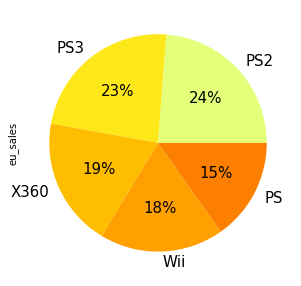

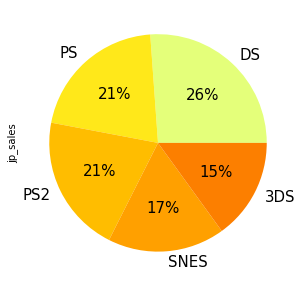

In [18]:
def func_top_platfroms (groupby,region_sales):
    pivot = df.groupby(groupby).agg({region_sales:'sum'}).sort_values(by=region_sales, ascending=False,)[:5]
    plot=pivot.plot(kind='pie',subplots=True,fontsize=15,figsize=(20,5),colormap='Wistia',legend=False, autopct="%1.0f%%")
    
func_top_platfroms('platform','na_sales')
func_top_platfroms('platform','eu_sales')
func_top_platfroms('platform','jp_sales')

#### Вывод

Из полученных графиков можно сделать вывод, что в Америке и Европе популярны одинаковые платформы: PS2,PS3,Wii,X360. В Японии пользователи выбирают другие консоли: DS, PS, 3DS, SNES

### Самые популярные жанры игр для пользователей из North America/Europe/Japan

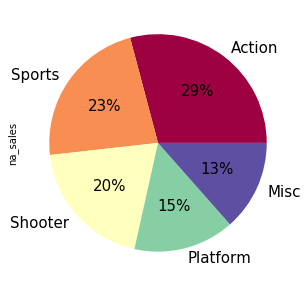

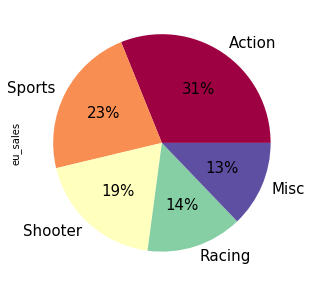

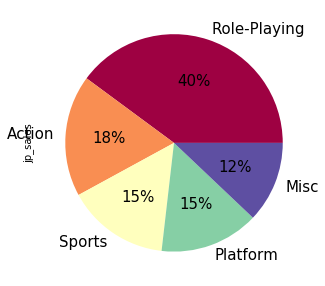

In [19]:
def func_top_platfroms (groupby,genre):
    pivot = df.groupby(groupby).agg({genre:'sum'}).sort_values(by=genre, ascending=False,)[:5]
    plot=pivot.plot(kind='pie',subplots=True,fontsize=15,figsize=(20,5),colormap='Spectral',legend=False, autopct="%1.0f%%")
    
func_top_platfroms('genre','na_sales')
func_top_platfroms('genre','eu_sales')
func_top_platfroms('genre','jp_sales')

#### Вывод

Лидируют в Америке и Европе жанр Action. В Японии самым популярным жанром является - Role-playing, который в Европе и Америке даже не входит в топ 5. Распределение по долям в Америке аналогично распределению в Европе за исключением 4 места. В Америке это игры жанра Platform. В Европе - Racing. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

E («Everyone») - от 6 лет
E10+ («Everyone 10 and older») - от 10 лет
T («Teen») - от 13 лет
M («Mature») - от 17 лет

In [20]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (actual_df[actual_df['rating'] != 0].pivot_table(index='rating', values=column, aggfunc='sum').
              sort_values(column, ascending=False))
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    display(region)

,na_sales,ratio
rating,,
M,165.21,0.47
E,79.05,0.23
E10+,54.24,0.16
T,49.79,0.14


,eu_sales,ratio
rating,,
M,145.32,0.46
E,83.36,0.27
E10+,42.69,0.14
T,41.95,0.13


,jp_sales,ratio
rating,,
T,20.59,0.37
E,15.14,0.27
M,14.11,0.25
E10+,5.89,0.11


#### Вывод

Также как и с жанрами распределение игр в Америке аналогично распределению в Европе. Спросом пользуются игры для взрослых, далее идут игры для всех и игры от 10 лет. В Японии лидируют по продажам игры для подростков. Игры для взрослых только на третьем месте.


## Проверка гипотез

Гипотеза №1 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

α=5%

In [21]:
xone = actual_df.query('platform == "XOne" & user_score != 0')['user_score']
pc = actual_df.query('platform == "PC" & user_score != 0')['user_score']
display(xone)

#Проверка равенства дисперсий
variance_estimate_xone = np.var(xone, ddof=1)
print(variance_estimate_xone)

variance_estimate_pc = np.var(pc, ddof=1)
print(variance_estimate_pc)

#Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
#применим метод scipy.stats.ttest_ind

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

1.9069968429360695
3.035892752408882
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Применялся критерий Стьюдента для проверки равенства средних значений в двух выборках. Сначала проверялось равенство дисперсий. Т.к. они не равны, то параметр equal var в t-тесте  равен False. Статистический тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть.

Гипотеза №2 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1 — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

α=5%

In [22]:
action = actual_df.query('genre == "Action" & user_score != 0')['user_score']
sports = actual_df.query('genre == "Sports" & user_score != 0')['user_score']
print(action)

#Проверка равенства дисперсий
variance_estimate_xone = np.var(action, ddof=1)
print(variance_estimate_xone)

variance_estimate_pc = np.var(sports, ddof=1)
print(variance_estimate_pc)

#Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
#применим метод scipy.stats.ttest_ind

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
action_sports = actual_df.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')


16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 389, dtype: float64
1.7693609042482705
3.180612814465409
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


,user_score
genre,
Action,3.472324
Sports,3.916355


#### Вывод

Применялся критерий Стьюдента для проверки равенства средних значений в двух выборках.Сначала проверялось равенство дисперсий. Т.к. они не равны, то параметр equal var в t-тесте  равен False. Исходная гипотеза отвергнута. При выборе между продвижением игр двух жанров, при прочих равных условиях лучше отдать предпочтение жанру Sports.

# Общий вывод

В заключении, исходя из данных, можно определить следующие характеристики успешной игры:

1. Платформа, на которой нужно разрабатывать игру, должна быть PS4.
2. Жанр Action 
3. Необходимо ориентироваться на отзывы критиков, так как от них зависят объемы продаж
4. Рейтинг игры следует выбрать M (для взрослых, от 17 лет)
